## ¿Se ha reducido la contaminación del aire debido a la pandemia por COVID 19?

El SISAIRE es la principal fuente de información para el diseño, evaluación y ajuste de las políticas y estrategias nacionales y regionales de prevención y control de la calidad del aire. Es un sistema bajo ambiente Web que permite al IDEAM la captura y revisión constante de los datos que las autoridades ambientales toman sobre calidad del aire y reportan al Sistema.

Este sistema de información permite: 1) Recolectar información de las variables metereológicas y de calidad del aire, la cual es generada por los distintos SVCA que administran las autoridades ambientales, facilitando la disponibilidad y la calidad de la información ambiental que se requiera por parte del Ministerio de Ambiente y Desarrollo Sostenible MADS para el logro del desarrollo sostenible del país. 2) Facilitar el acceso y consulta de la información a los ciudadanos y las instituciones encargadas de la investigación en el tema ambiental.

Datis disponibles en: http://www.ideam.gov.co/web/contaminacion-y-calidad-ambiental/sisaire

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sbn
import matplotlib.dates as mdates

In [3]:
df=pd.read_csv("reporte_sisaire_all__2020_pm10.csv", sep=',')
df6=pd.read_csv("reporte_sisaire_all_2020_pm25.csv", sep=',')
df7=pd.read_csv("reporte_sisaire_all_2020_o3.csv", sep=',')

In [4]:
df.tail()

,Estacion,Fecha inicial,Fecha final,PM10
46851,UNIVERSIDAD DEL VALLE,2020-04-22 13:00,2020-04-22 13:59,16.6
46852,UNIVERSIDAD DEL VALLE,2020-04-22 12:00,2020-04-22 12:59,17.8
46853,UNIVERSIDAD DEL VALLE,2020-04-22 11:00,2020-04-22 11:59,14.6
46854,UNIVERSIDAD DEL VALLE,2020-04-22 10:00,2020-04-22 10:59,12.3
46855,UNIVERSIDAD DEL VALLE,2020-04-22 09:00,2020-04-22 09:59,18.5


In [5]:
def calcularICAPM10(valor):
    if (valor>=0 and valor<=54):
        Icalto=50
        Icbajo=0
        Pcalto=54
        Pcbajo=0
        calculo=((Icalto-Icbajo)/(Pcalto-Pcbajo))*(valor-Pcbajo)+Icbajo
        return calculo
    elif (valor>=55 and valor<=154):
        Icalto=100
        Icbajo=51
        Pcalto=154
        Pcbajo=55
        calculo=((Icalto-Icbajo)/(Pcalto-Pcbajo))*(valor-Pcbajo)+Icbajo
        return calculo
    elif (valor>=155 and valor<=254):
        Icalto=150
        Icbajo=101
        Pcalto=254
        Pcbajo=155
        calculo=((Icalto-Icbajo)/(Pcalto-Pcbajo))*(valor-Pcbajo)+Icbajo
        return calculo
    elif (valor>=255 and valor<=354):
        Icalto=200
        Icbajo=151
        Pcalto=354
        Pcbajo=255
        calculo=((Icalto-Icbajo)/(Pcalto-Pcbajo))*(valor-Pcbajo)+Icbajo
        return calculo
    elif (valor>=355 and valor<=424):
        Icalto=300
        Icbajo=201
        Pcalto=424
        Pcbajo=355
        calculo=((Icalto-Icbajo)/(Pcalto-Pcbajo))*(valor-Pcbajo)+Icbajo
        return calculo
    elif (valor>=425 and valor<=604):
        Icalto=500
        Icbajo=301
        Pcalto=604
        Pcbajo=425
        calculo=((Icalto-Icbajo)/(Pcalto-Pcbajo))*(valor-Pcbajo)+Icbajo
        return calculo
    

In [6]:
def calcularICAPM25(valor):
    if (valor>=0 and valor<=12):
        Icalto=50
        Icbajo=0
        Pcalto=12
        Pcbajo=0
        calculo=((Icalto-Icbajo)/(Pcalto-Pcbajo))*(valor-Pcbajo)+Icbajo
        return calculo
    elif (valor>=13 and valor<=37):
        Icalto=100
        Icbajo=51
        Pcalto=37
        Pcbajo=13
        calculo=((Icalto-Icbajo)/(Pcalto-Pcbajo))*(valor-Pcbajo)+Icbajo
        return calculo
    elif (valor>=38 and valor<=55):
        Icalto=150
        Icbajo=101
        Pcalto=55
        Pcbajo=38
        calculo=((Icalto-Icbajo)/(Pcalto-Pcbajo))*(valor-Pcbajo)+Icbajo
        return calculo
    elif (valor>=56 and valor<=150):
        Icalto=200
        Icbajo=151
        Pcalto=150
        Pcbajo=56
        calculo=((Icalto-Icbajo)/(Pcalto-Pcbajo))*(valor-Pcbajo)+Icbajo
        return calculo
    elif (valor>=151 and valor<=250):
        Icalto=300
        Icbajo=201
        Pcalto=250
        Pcbajo=151
        calculo=((Icalto-Icbajo)/(Pcalto-Pcbajo))*(valor-Pcbajo)+Icbajo
        return calculo
    elif (valor>=251 and valor<=500):
        Icalto=500
        Icbajo=301
        Pcalto=500
        Pcbajo=251
        calculo=((Icalto-Icbajo)/(Pcalto-Pcbajo))*(valor-Pcbajo)+Icbajo
        return calculo

In [7]:
def calcularICAO3(valor):
    if (valor>=0 and valor<=106):
        Icalto=50
        Icbajo=0
        Pcalto=106
        Pcbajo=0
        calculo=((Icalto-Icbajo)/(Pcalto-Pcbajo))*(valor-Pcbajo)+Icbajo
        return calculo
    elif (valor>=107 and valor<=138):
        Icalto=100
        Icbajo=51
        Pcalto=138
        Pcbajo=107
        calculo=((Icalto-Icbajo)/(Pcalto-Pcbajo))*(valor-Pcbajo)+Icbajo
        return calculo
    elif (valor>=139 and valor<=167):
        Icalto=150
        Icbajo=101
        Pcalto=167
        Pcbajo=139
        calculo=((Icalto-Icbajo)/(Pcalto-Pcbajo))*(valor-Pcbajo)+Icbajo
        return calculo
    elif (valor>=168 and valor<=207):
        Icalto=200
        Icbajo=151
        Pcalto=207
        Pcbajo=168
        calculo=((Icalto-Icbajo)/(Pcalto-Pcbajo))*(valor-Pcbajo)+Icbajo
        return calculo
    elif (valor>=208 and valor<=393):
        Icalto=300
        Icbajo=201
        Pcalto=393
        Pcbajo=208
        calculo=((Icalto-Icbajo)/(Pcalto-Pcbajo))*(valor-Pcbajo)+Icbajo
        return calculo
    elif (valor>=394 and valor<=500):
        Icalto=500
        Icbajo=301
        Pcalto=500
        Pcbajo=251
        calculo=((Icalto-Icbajo)/(Pcalto-Pcbajo))*(valor-Pcbajo)+Icbajo
        return calculo

In [8]:
df['ICA']=df['PM10'].apply(calcularICAPM10)

In [9]:
df6['ICA']=df6['PM2.5'].apply(calcularICAPM25)

In [10]:
df7['ICA']=df7['O3'].apply(calcularICAO3)

In [11]:
df.index=df['Fecha inicial']

In [12]:
df6.index=df6['Fecha inicial']

In [13]:
df7.index=df7['Fecha inicial']

In [14]:
df.index=pd.to_datetime(df.index)

In [15]:
df6.index=pd.to_datetime(df6.index)

In [16]:
df7.index=pd.to_datetime(df7.index)

In [17]:
columnas=['ICA']
diario=df[columnas].resample('2H').mean()
#semanal=df3[columnas].resample('W').mean()

In [18]:
columnaspm25=['ICA']
diario2=df6[columnaspm25].resample('12H').mean()
#semanal=df3[columnas].resample('W').mean()

In [19]:
columnaso3=['ICA']
diario_o3=df7[columnaso3].resample('H').mean()
#semanal=df3[columnas].resample('W').mean()

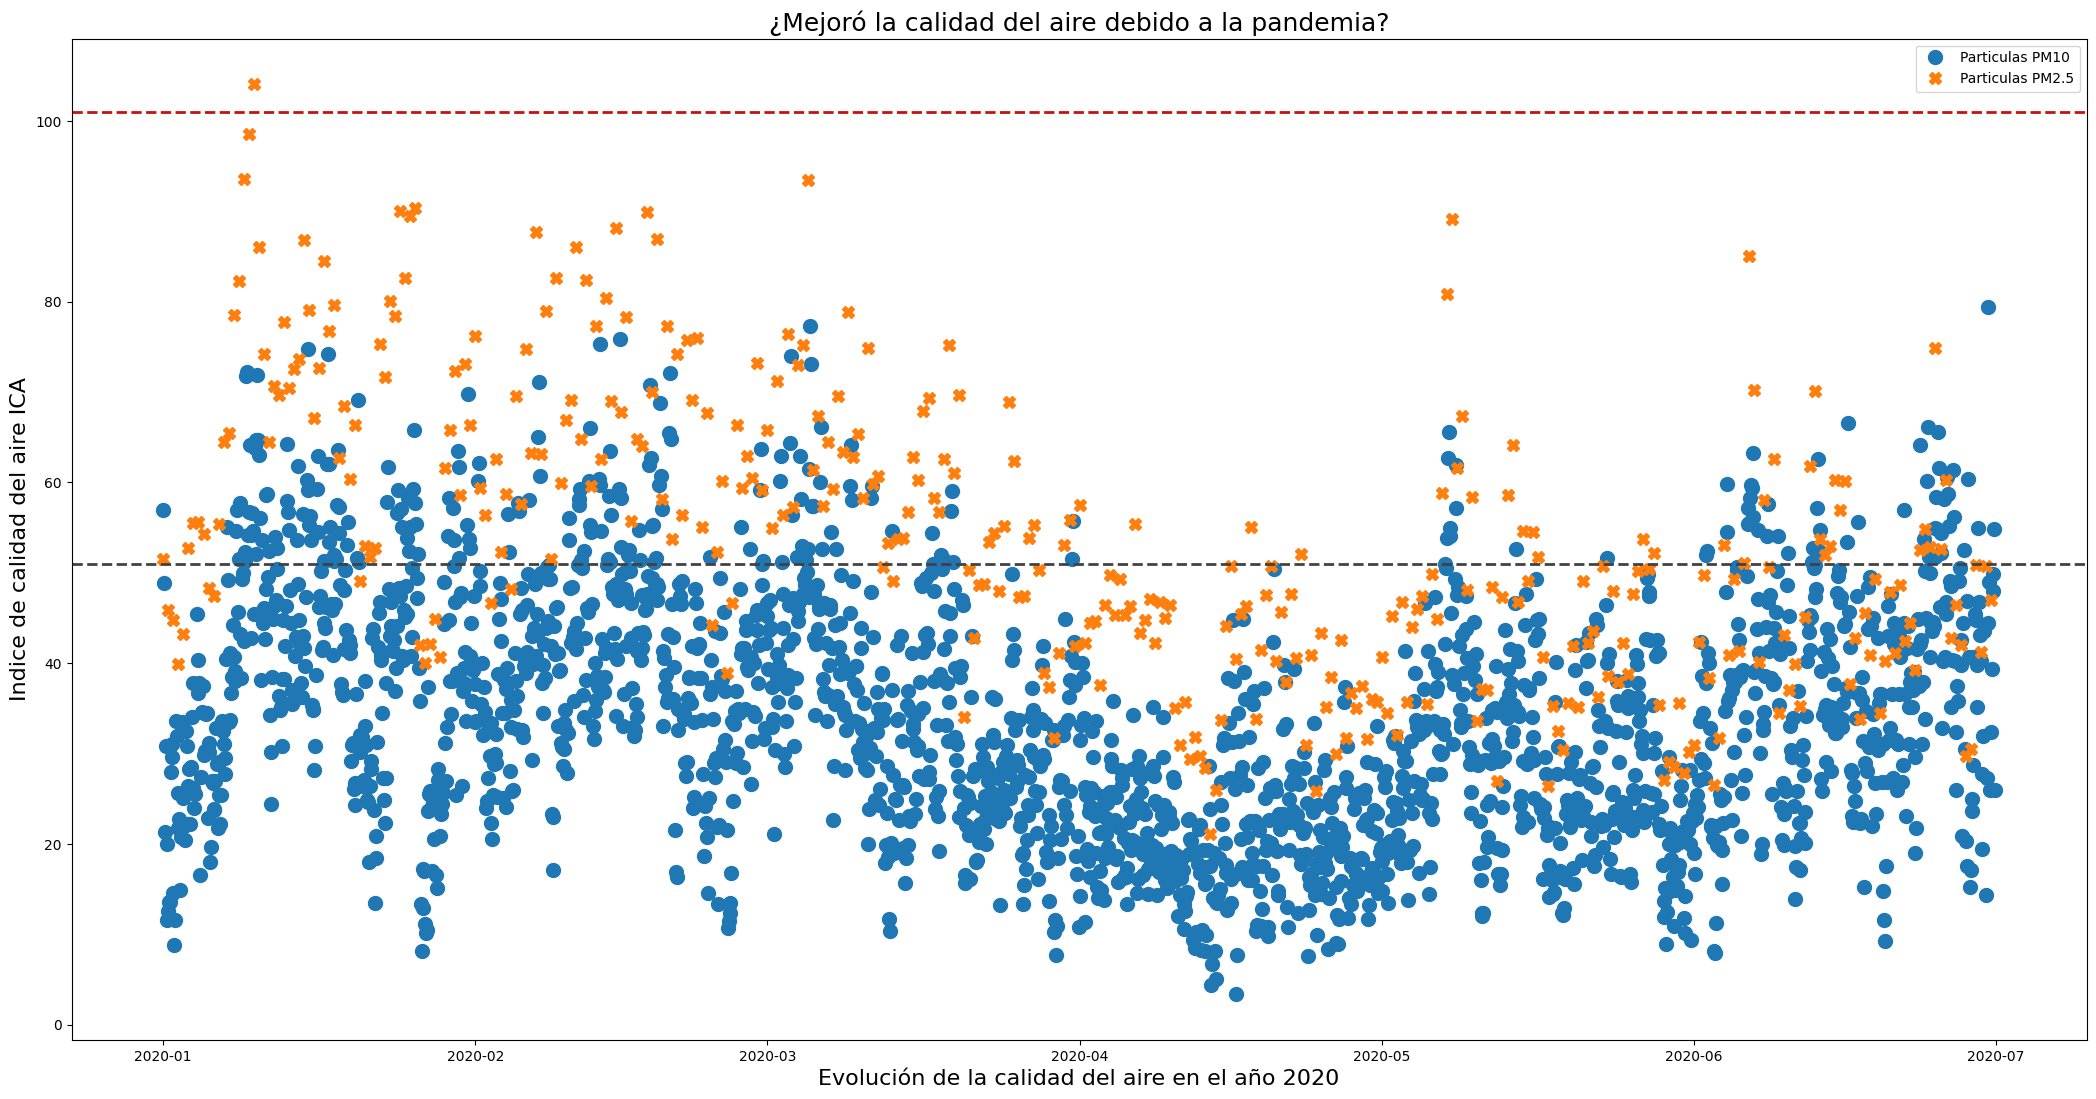

In [21]:
inicio, final='2020-01','2020-06'
fig, eje=plt.subplots(figsize=(26,13))
eje.plot(diario.loc[inicio:final, 'ICA'],marker='o',label='Particulas PM10', linestyle="None",markersize=10)
eje.plot(diario2.loc[inicio:final, 'ICA'],marker='X',label='Particulas PM2.5', linestyle="None",markersize=8)
#eje.plot(diario_o3.loc[inicio:final, 'ICA'],marker='o',label='Contaminantes O3',linestyle="None",markersize=5)

#eje.plot(diario.loc[inicio:final, 'residential_percent_change_from_baseline'],marker='.',label='residential_percent_change_from_baseline')
eje.set_ylabel("Indice de calidad del aire ICA",size=16)
eje.set_title("¿Mejoró la calidad del aire debido a la pandemia?", size=18)
eje.set_xlabel("Evolución de la calidad del aire en el año 2020",size=16)
#eje.axvline(pd.to_datetime('2020-03-20'),linestyle ='--', color='#a2a1a6', linewidth=2)
#eje.axvline(pd.to_datetime('2020-05'),linestyle ='--', color='#a2a1a6', linewidth=2)

eje.axhline(101,linestyle ='--', color='#c01414', linewidth=2)
eje.axhline(51,linestyle ='--', color='#424242', linewidth=2)



""" eje.annotate("Se declara confinamiento total en Colombia \n a partir de este momento se nota disminucion \n de niveles de contaminantes en el aire",
                  xy=(pd.to_datetime('2020-04-10'), 80),
                  #xytext=(pd.to_datetime('2020-04-05'), 90),
                  size=12, va="center", ha="center"
                  )
 """

# Define the date format
eje.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#eje.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
eje.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#eje.xaxis.set_major_formatter(date_form)
eje.legend()

In [22]:
pos_pm10 = diario.copy()
neg_pm10 = diario.copy()
pos_pm25= diario2.copy()
neg_pm25 = diario2.copy()
other_pm25 = diario2.copy()

In [23]:
pos_pm10[pos_pm10['ICA']<51] = np.nan
neg_pm10[neg_pm10['ICA']>=50] = np.nan
pos_pm25[pos_pm25['ICA']<51] = np.nan
neg_pm25[neg_pm25['ICA']>=50] = np.nan
other_pm25[other_pm25['ICA']<100] = np.nan


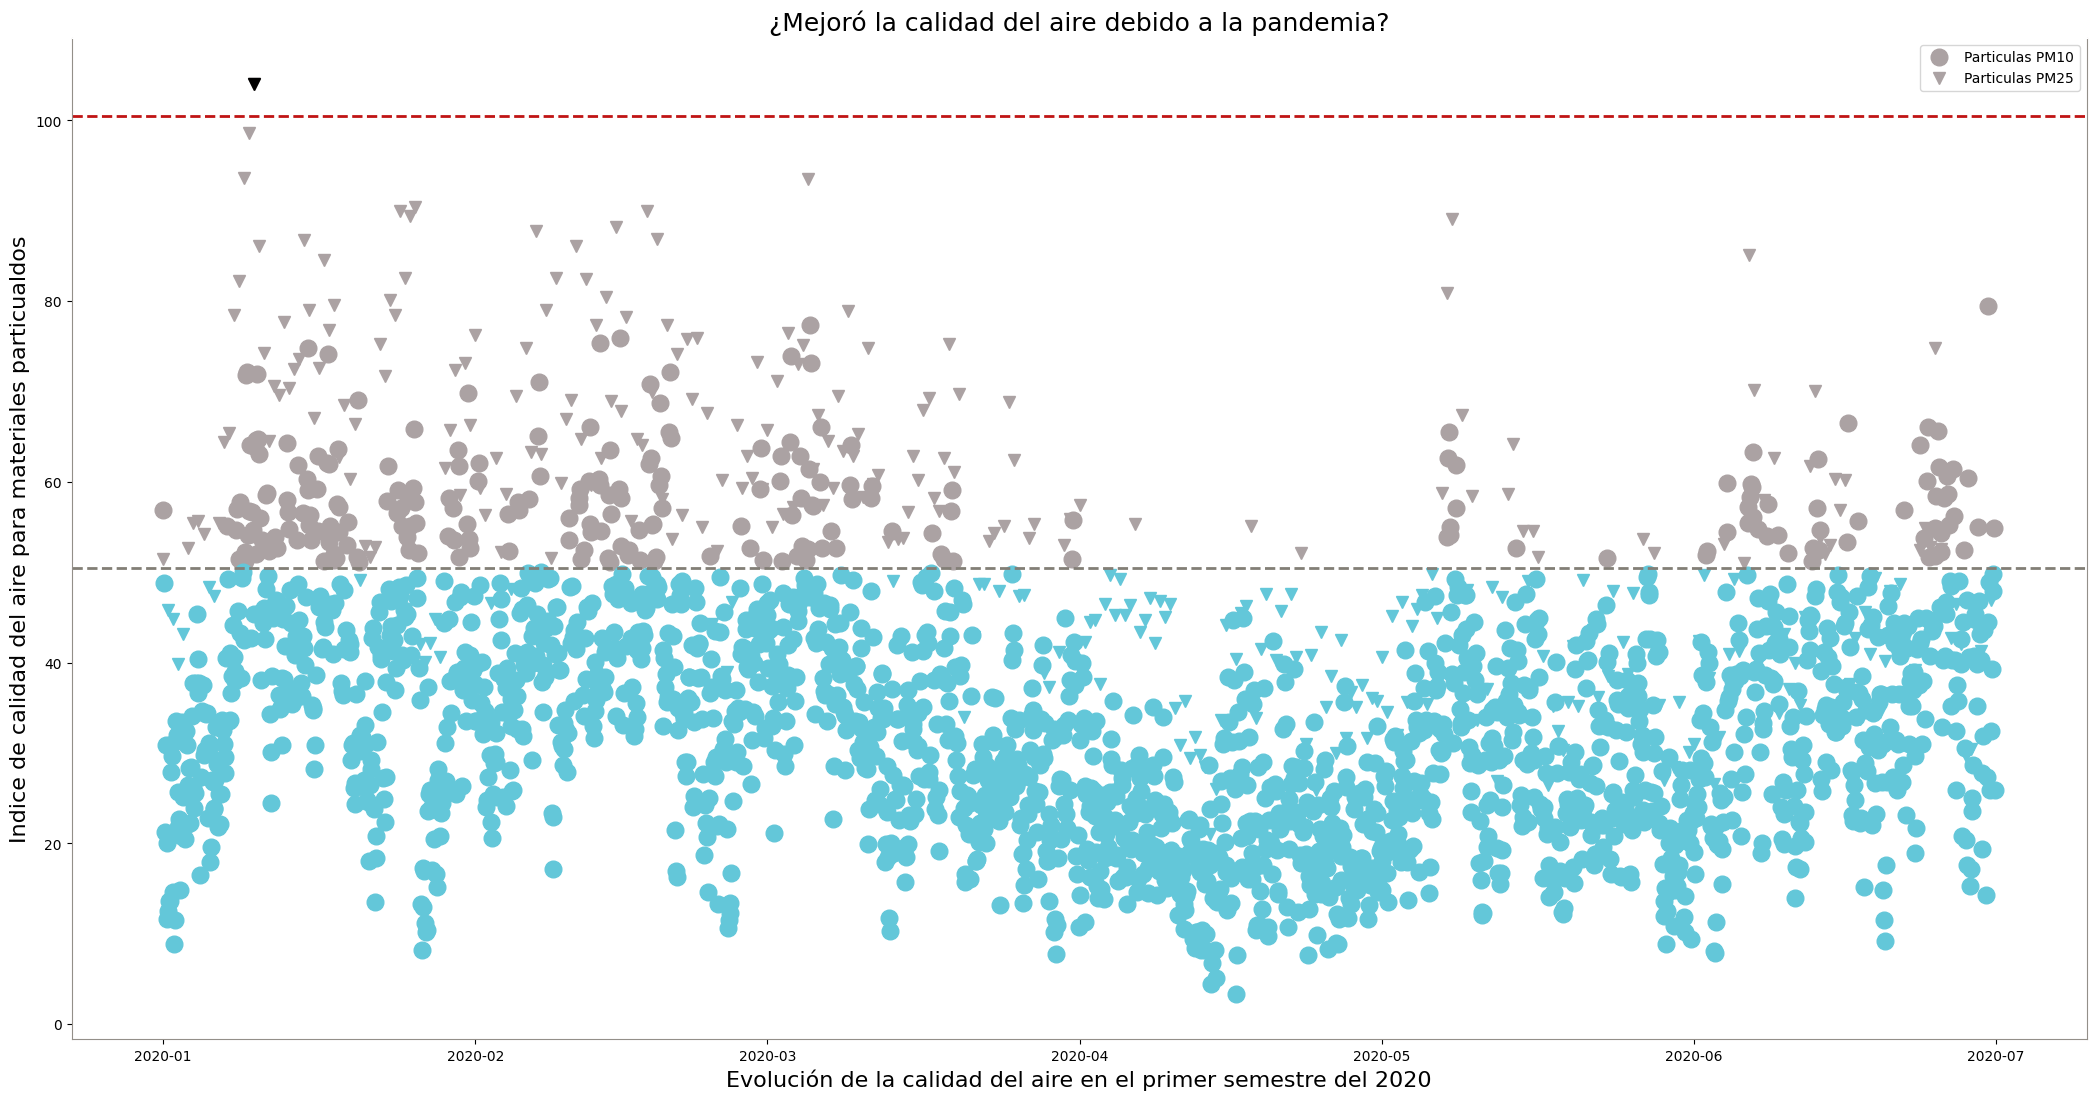

In [32]:
inicio, final='2020-01','2020-06'
fig, eje=plt.subplots(figsize=(26,13))
eje.plot(pos_pm10.loc[inicio:final, 'ICA'],marker='o', linestyle="None",label='Particulas PM10',markersize=12,color="#aba2a3")
eje.plot(neg_pm10.loc[inicio:final, 'ICA'],marker='o', linestyle="None",markersize=12,color="#63c7d9")
eje.plot(pos_pm25.loc[inicio:final, 'ICA'],marker='v', linestyle="None",label='Particulas PM25',markersize=8,color="#aba2a3")
eje.plot(neg_pm25.loc[inicio:final, 'ICA'],marker='v', linestyle="None",markersize=8,color="#63c7d9")
eje.plot(other_pm25.loc[inicio:final, 'ICA'],marker='v', linestyle="None",markersize=8,color="#000000")
eje.set_title("¿Mejoró la calidad del aire debido a la pandemia?", size=18)



#eje.plot(diario.loc[inicio:final, 'residential_percent_change_from_baseline'],marker='.',label='residential_percent_change_from_baseline')
eje.set_ylabel("Indice de calidad del aire para materiales particualdos",size=16)
#eje.set_title("El efecto de la pandemia en calidad del aire, presencia de materiales particulados", size=18)
eje.set_xlabel("Evolución de la calidad del aire en el primer semestre del 2020",size=16)
#eje.axvline(pd.to_datetime('2020-03-20'),linestyle ='--', color='#a2a1a6', linewidth=2)
#eje.axvline(pd.to_datetime('2020-05'),linestyle ='--', color='#a2a1a6', linewidth=2)

eje.axhline(100.5,linestyle ='--', color='#c01414', linewidth=2)
eje.axhline(50.5,linestyle ='--', color='#827e76', linewidth=2)

eje.spines['bottom'].set_color('#938f89')
eje.spines['top'].set_color('#FFFFFF')
eje.spines['right'].set_color('#938f89')
eje.spines['left'].set_color('#938f89')



""" eje.annotate("Se declara confinamiento total en Colombia \n a partir de este momento se nota disminucion \n de niveles de contaminantes en el aire",
                  xy=(pd.to_datetime('2020-04-10'), 80),
                  #xytext=(pd.to_datetime('2020-04-05'), 90),
                  size=12, va="center", ha="center"
                  )
 """

# Define the date format
eje.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#eje.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
eje.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#eje.xaxis.set_major_formatter(date_form)
eje.legend()